In [7]:
%matplotlib inline

In [31]:
import gc
import numpy as np
import pandas as pd
from datetime import datetime
import xgboost as xgb
import matplotlib.pyplot as plt
from tqdm import tqdm


In [40]:
pd.options.display.max_columns = 200

In [41]:
BASE = './'
transpose_microbusiness_density = pd.read_csv(BASE + 'k_means_graph_scaled_update.csv')

In [42]:
transpose_microbusiness_density

,cfips,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2201,2202,2203,2204,2205,2206,2207,2208,2209,2210,2211,2212,K-means_Silhouette,K-means_Elbow
0,1001,0.000000,0.103992,0.324974,0.331474,0.318475,0.285977,0.311975,0.220982,0.266479,0.259979,0.493961,0.522671,0.625877,0.632328,0.729084,0.567824,0.658130,0.909695,0.870993,0.922596,0.980649,0.922596,1.000000,0,0
1,1003,0.209036,0.291208,0.356230,0.390528,0.409106,0.298353,0.220468,0.081848,0.117575,0.199032,0.234044,0.000000,0.107019,0.252259,0.292564,0.207088,0.921473,1.000000,0.902015,0.724114,0.745657,0.624045,0.615705,0,3
2,1005,0.076666,0.000000,0.229999,0.204443,0.255554,0.459997,0.511108,0.332220,0.408887,0.485553,0.485553,0.663586,0.767098,0.715343,0.689464,0.663586,0.689464,0.818854,0.715343,0.767098,0.896489,0.974122,1.000000,0,0
3,1007,0.721295,0.721295,0.520935,0.520935,0.360647,0.360647,0.160288,0.000000,0.000000,0.320576,0.160288,0.195318,0.356255,0.557426,0.476957,0.436723,0.637894,1.000000,0.758596,0.919532,0.718362,0.637894,0.718362,1,4
4,1009,0.000000,0.069142,0.082971,0.193598,0.152113,0.165941,0.138284,0.248913,0.262741,0.276569,0.387197,0.392795,0.544597,0.668798,0.461796,0.365194,0.516997,0.875800,0.903400,1.000000,0.875800,0.903400,1.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,56037,0.991738,1.000000,0.913254,0.880208,0.929777,0.859555,0.884339,0.764548,0.624102,0.409304,0.339082,0.189569,0.144238,0.086542,0.090664,0.049453,0.000000,0.070058,0.037090,0.037090,0.053574,0.041211,0.123632,1,7
3131,56039,0.000000,0.127806,0.319516,0.328645,0.383420,0.337774,0.438193,0.264743,0.360597,0.392549,0.547743,0.277459,0.196678,0.367216,0.358241,0.255020,0.380681,0.627510,0.753170,0.757657,0.914731,1.000000,0.950635,0,0
3132,56041,0.147647,0.167333,0.088588,0.088588,0.000000,0.000000,0.108274,0.167333,0.196863,0.167333,0.590588,0.557363,0.842618,0.940982,1.000000,0.744254,0.773763,0.881963,0.872127,0.901636,0.921309,0.931145,0.980327,0,3
3133,56043,0.629281,1.000000,0.841120,0.682241,0.576321,0.576321,0.523361,0.364482,0.576321,0.364482,0.364482,0.264975,0.264975,0.211980,0.105990,0.000000,0.582944,0.900914,0.847918,0.847918,0.582944,0.635938,0.370965,1,4


In [43]:
test__d = transpose_microbusiness_density.copy()
test__d.columns = test__d.columns.str.replace('2019-', '9')
test__d.columns = test__d.columns.str.replace('2020-', '0')
test__d.columns = test__d.columns.str.replace('2021-', '1')
test__d.columns = test__d.columns.str.replace('2022-', '2')
test__d.columns = test__d.columns.str.replace('2023-', '3')
test__d.columns = test__d.columns.str.replace('-01', '')

In [44]:
test__d

,cfips,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2201,2202,2203,2204,2205,2206,2207,2208,2209,2210,2211,2212,K-means_Silhouette,K-means_Elbow
0,1001,0.000000,0.103992,0.324974,0.331474,0.318475,0.285977,0.311975,0.220982,0.266479,0.259979,0.493961,0.522671,0.625877,0.632328,0.729084,0.567824,0.658130,0.909695,0.870993,0.922596,0.980649,0.922596,1.000000,0,0
1,1003,0.209036,0.291208,0.356230,0.390528,0.409106,0.298353,0.220468,0.081848,0.117575,0.199032,0.234044,0.000000,0.107019,0.252259,0.292564,0.207088,0.921473,1.000000,0.902015,0.724114,0.745657,0.624045,0.615705,0,3
2,1005,0.076666,0.000000,0.229999,0.204443,0.255554,0.459997,0.511108,0.332220,0.408887,0.485553,0.485553,0.663586,0.767098,0.715343,0.689464,0.663586,0.689464,0.818854,0.715343,0.767098,0.896489,0.974122,1.000000,0,0
3,1007,0.721295,0.721295,0.520935,0.520935,0.360647,0.360647,0.160288,0.000000,0.000000,0.320576,0.160288,0.195318,0.356255,0.557426,0.476957,0.436723,0.637894,1.000000,0.758596,0.919532,0.718362,0.637894,0.718362,1,4
4,1009,0.000000,0.069142,0.082971,0.193598,0.152113,0.165941,0.138284,0.248913,0.262741,0.276569,0.387197,0.392795,0.544597,0.668798,0.461796,0.365194,0.516997,0.875800,0.903400,1.000000,0.875800,0.903400,1.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,56037,0.991738,1.000000,0.913254,0.880208,0.929777,0.859555,0.884339,0.764548,0.624102,0.409304,0.339082,0.189569,0.144238,0.086542,0.090664,0.049453,0.000000,0.070058,0.037090,0.037090,0.053574,0.041211,0.123632,1,7
3131,56039,0.000000,0.127806,0.319516,0.328645,0.383420,0.337774,0.438193,0.264743,0.360597,0.392549,0.547743,0.277459,0.196678,0.367216,0.358241,0.255020,0.380681,0.627510,0.753170,0.757657,0.914731,1.000000,0.950635,0,0
3132,56041,0.147647,0.167333,0.088588,0.088588,0.000000,0.000000,0.108274,0.167333,0.196863,0.167333,0.590588,0.557363,0.842618,0.940982,1.000000,0.744254,0.773763,0.881963,0.872127,0.901636,0.921309,0.931145,0.980327,0,3
3133,56043,0.629281,1.000000,0.841120,0.682241,0.576321,0.576321,0.523361,0.364482,0.576321,0.364482,0.364482,0.264975,0.264975,0.211980,0.105990,0.000000,0.582944,0.900914,0.847918,0.847918,0.582944,0.635938,0.370965,1,4


In [46]:
test__d.drop(['cfips','K-means_Elbow','K-means_Silhouette'],inplace=True,axis=1)
test__d.dropna(axis=1,inplace=True)

In [50]:
scaled_df = test__d

### 시계열 데이터에서 군집화를 사용할 때 동적 시간 왜곡(DTW)를 사용한다고 합니다.
### 그리고 DTW를 사용할 때 2가지 분석을 같이 사용하는데 엘보우 분석, 실루엣분석을 사용한다고 합니다.(최적의 K값을 찾기위해)
### 진행결과 적정 K값은 2개 14개가 나왔습니다.
### 아래 보이시는 그래프는 2개 14개로 총 16개의 그래프와 해당 cfips 목록입니다.
### print() 없이 내용만 출력하시면 리스트 형태로 반환받으실 수 있습니다.

## K_means 을 통한 시계열 데이터 를 0과 1 로 나눈 그래프(칼럼명은 엘보우지만 사실 실루엣(k값=2)입니다.)

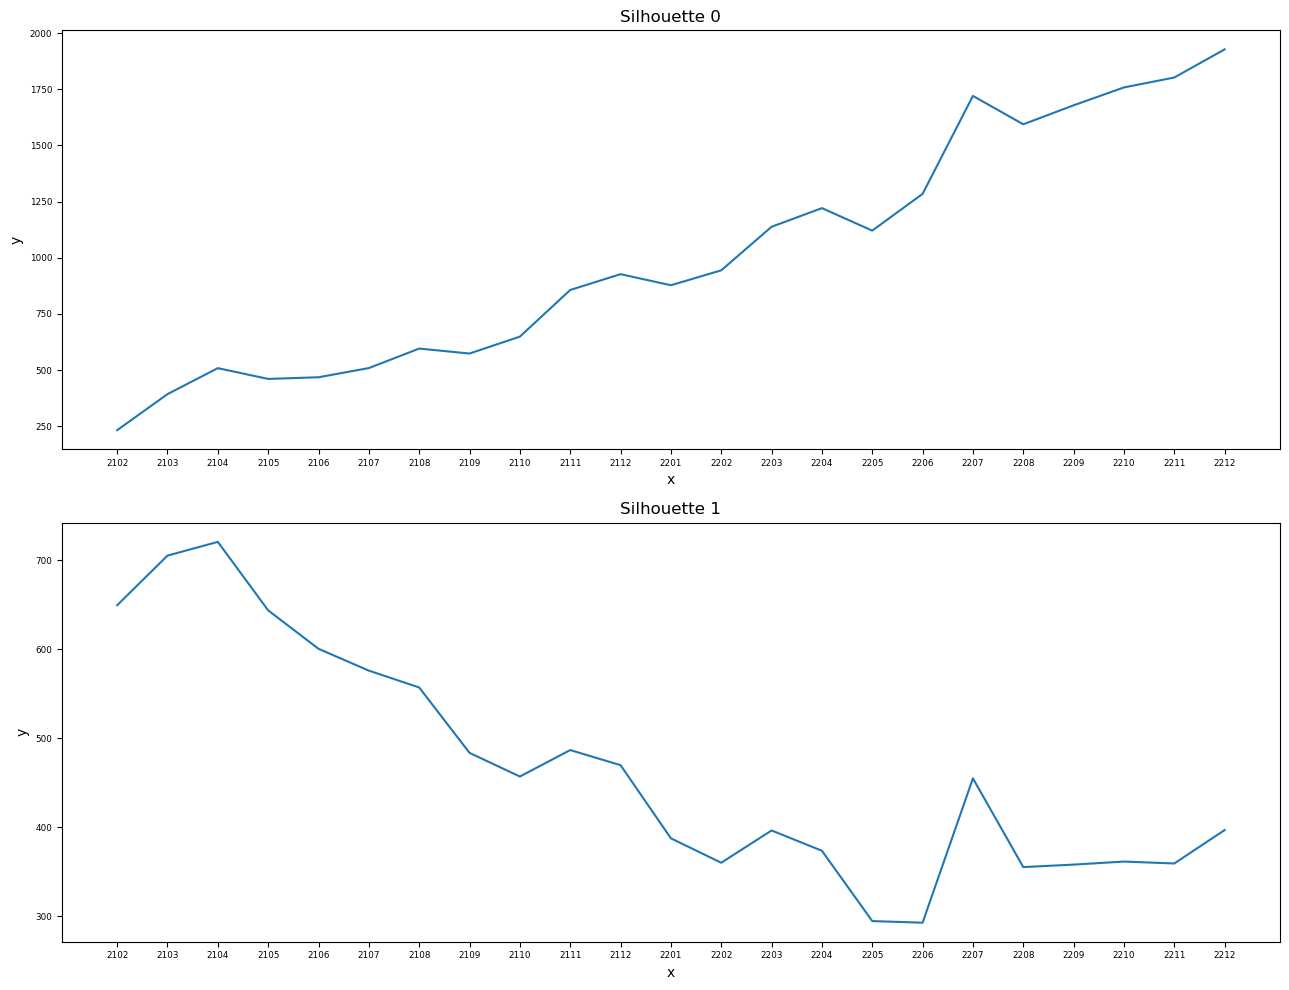

In [51]:
fig, axs = plt.subplots(transpose_microbusiness_density['K-means_Silhouette'].nunique(), 1, figsize=(13, 10))
for i, ax in enumerate(axs.flat):
    K_means_graph = scaled_df.loc[transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Silhouette']==i].index].sum()
    ax.plot(K_means_graph)
    ax.set_title(f'Silhouette {i}')
    ax.set_xlabel('x')
    ax.tick_params(axis='both', which='major', labelsize=6.3)
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()

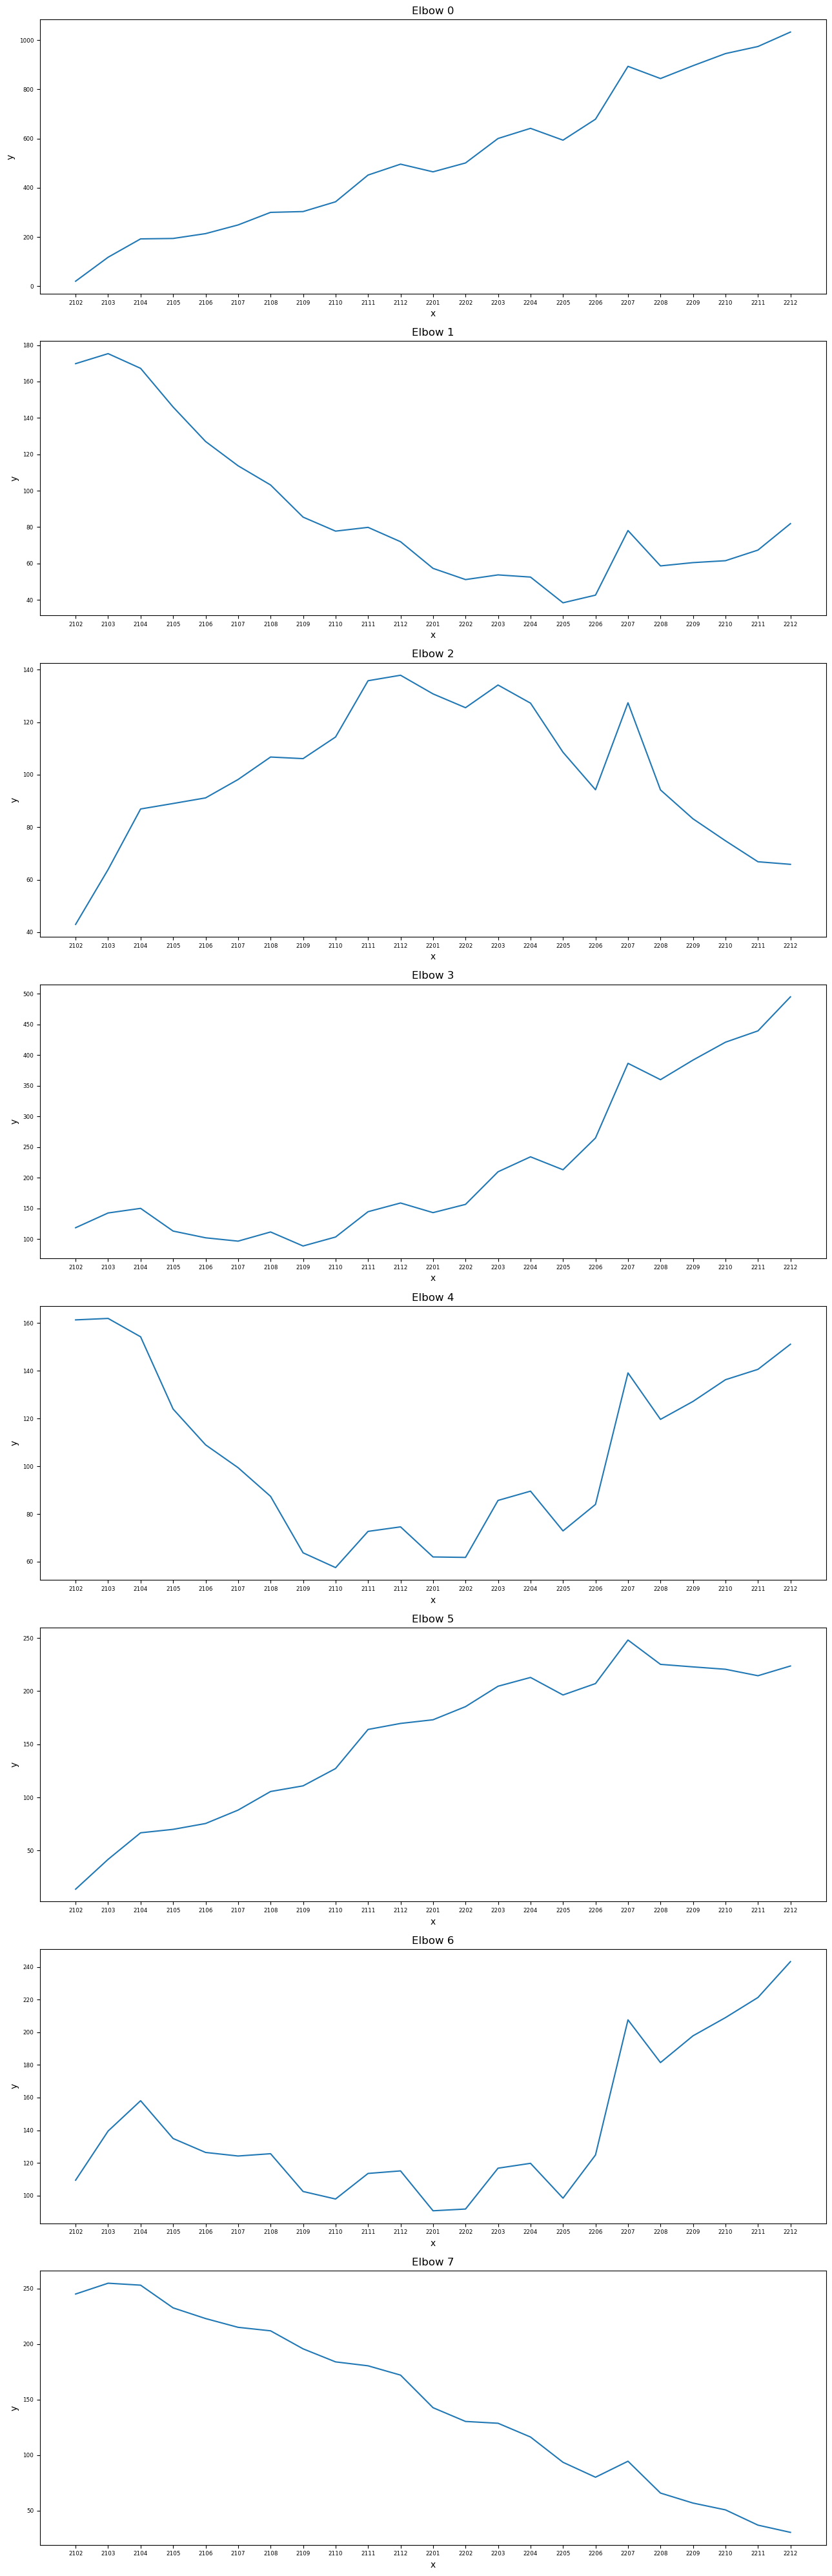

In [52]:
fig, axs = plt.subplots(transpose_microbusiness_density['K-means_Elbow'].nunique(), 1, figsize=(13, transpose_microbusiness_density['K-means_Elbow'].nunique()*5))
for i, ax in enumerate(axs.flat):
    K_means_graph = scaled_df.loc[transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==i].index].sum()
    ax.plot(K_means_graph)
    ax.set_title(f'Elbow {i}')
    ax.set_xlabel('x')
    ax.tick_params(axis='both', which='major', labelsize=6.3)
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()